### Based on Code provided by ChatGPT

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [13]:
# 1️⃣ Generate synthetic data
torch.manual_seed(0)
X = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)
y = 3 * X + 2 + 5 * torch.randn(X.size())

In [3]:
# 2️⃣ Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

In [4]:
# 3️⃣ Define Loss and Optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# 4️⃣ Train the model
epochs = 200
for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass and optimization
    # This step adjusts the model.linear layer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [20/200], Loss: 28.3141
Epoch [40/200], Loss: 26.2439
Epoch [60/200], Loss: 26.2395
Epoch [80/200], Loss: 26.2381
Epoch [100/200], Loss: 26.2374
Epoch [120/200], Loss: 26.2371
Epoch [140/200], Loss: 26.2370
Epoch [160/200], Loss: 26.2369
Epoch [180/200], Loss: 26.2369
Epoch [200/200], Loss: 26.2369


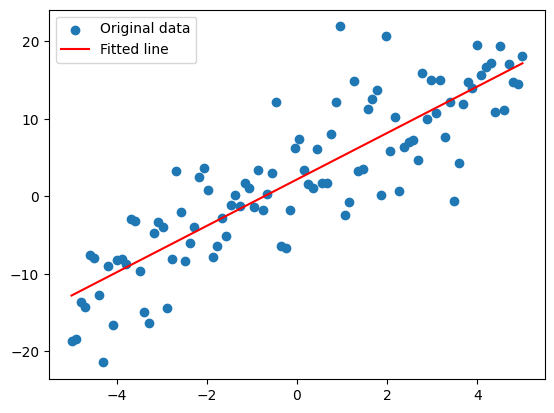

In [15]:
# 5️⃣ Plot results
predicted = model(X).detach()

plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), predicted.numpy(), 'r', label='Fitted line')
plt.legend()
plt.show()